<a href="https://colab.research.google.com/github/jiruneko/3Dpeg/blob/master/Dive_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(123)
df1 = pd.DataFrame({"x": np.random.uniform(size=50), "y": np.random.uniform(size=50), "target": np.repeat(0, 50)})
df2 = pd.DataFrame({"x": np.random.uniform(-1, 0, size=50), "y": np.random.uniform(-1, 0, size=50), "target": np.repeat(1, 50)})
df = pd.concat([df1, df2], ignore_index=True)
df

,x,y,target
0,0.696469,0.120629,0
1,0.286139,0.826341,0
2,0.226851,0.603060,0
3,0.551315,0.545068,0
4,0.719469,0.342764,0
...,...,...,...
95,-0.246474,-0.364100,1
96,-0.258138,-0.967802,1
97,-0.951421,-0.255219,1
98,-0.291303,-0.527087,1


In [ ]:
data0 = df.query('target == 0').loc[:, ["x", "y"]].values
target0 = df.query('target == 0').loc[:, "target"].values
data1 = df.query('target == 1').loc[:, ["x", "y"]].values
target1 = df.query('target == 1').loc[:, "target"].values

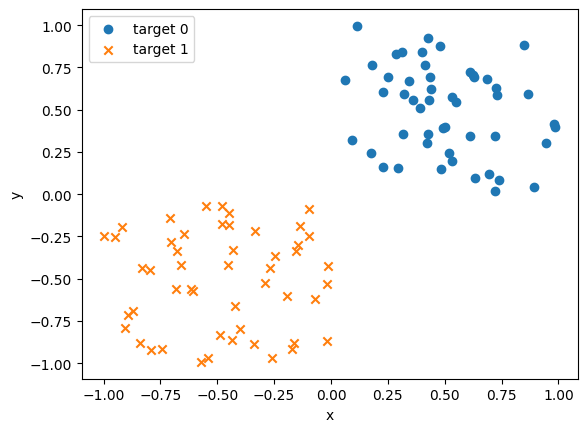

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)  # <-- 1
    svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- 2
    # 3
    fig, ax = plt.subplots()
    ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
    ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
    # 4
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red') # <-- 5

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()


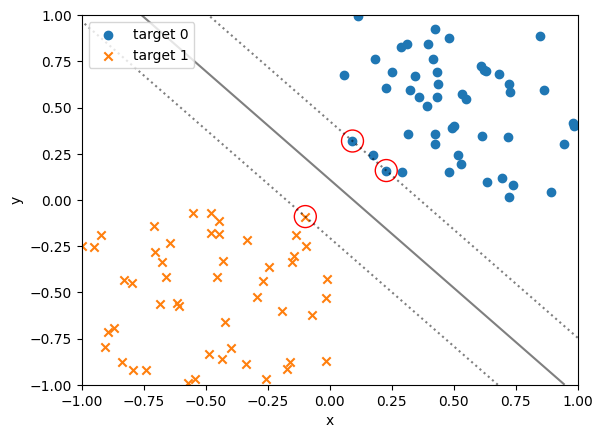

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=1e6)

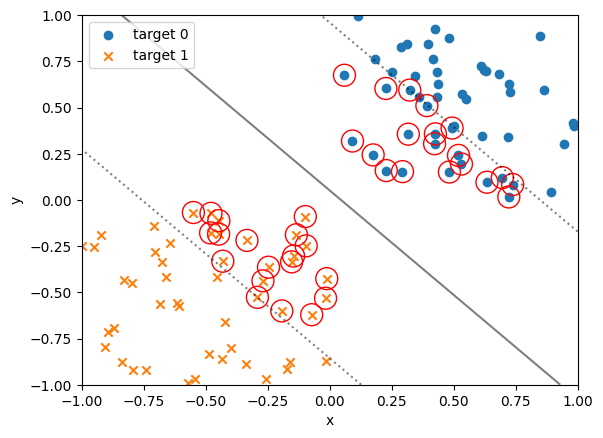

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=0.1)

In [ ]:
np.random.seed(123)
data = np.random.uniform(size=(50, 2))
target = (data[:, 1] > 2*(data[:, 0]-0.5)**2 + 0.5).astype(int)

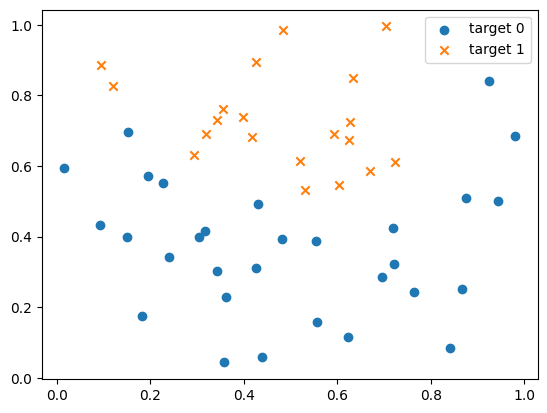

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[target == 0, 0], data[target == 0, 1], marker="o", label='target 0') # <-- 1
ax.scatter(data[target == 1, 0], data[target == 1, 1], marker="x", label='target 1') # <-- 2
ax.legend()
plt.show()

In [ ]:
data0, data1 = data[target == 0, :], data[target == 1, :]
target0, target1 = target[target == 0], target[target == 1]

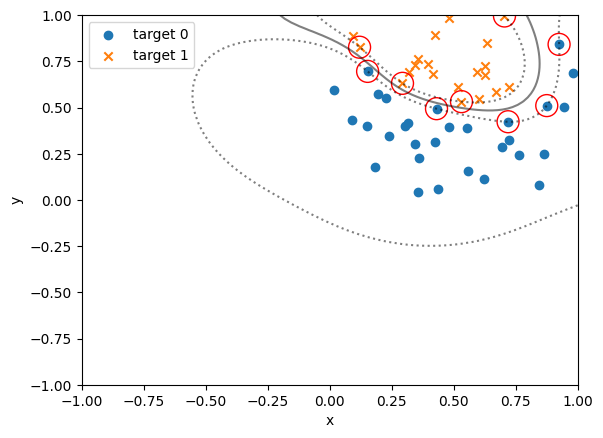

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6)


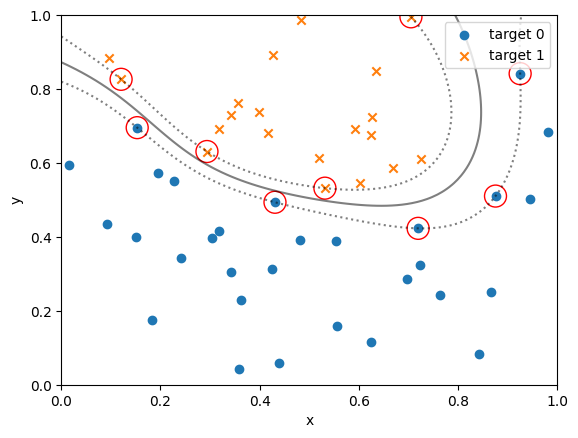

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6, xmin=0, ymin=0)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

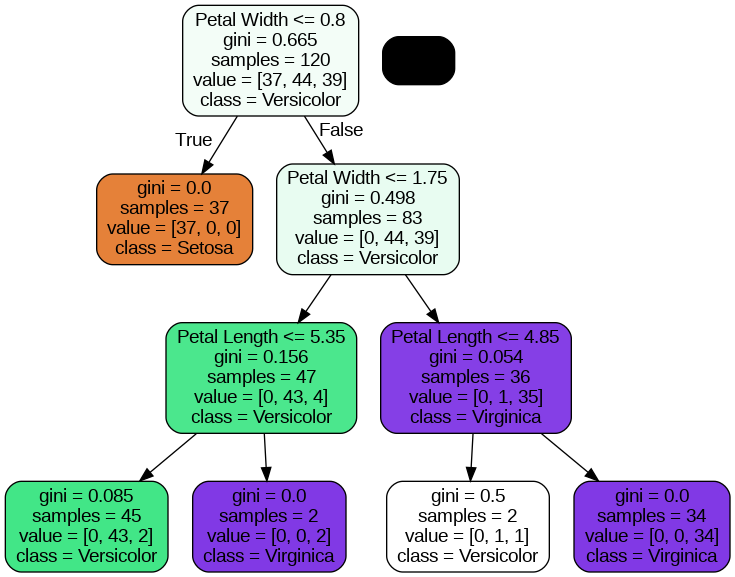

In [ ]:
from IPython.display import Image
Image('tree.png')

In [ ]:
target_pred = tree.predict(data_test)
target_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=123)

In [ ]:
forest.fit(data_train, target_train)

RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(data_train, target_train)

RandomForestClassifier(random_state=123)

In [ ]:
y_pred = forest.predict(data_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(data_train, target_train)

RandomForestClassifier(random_state=123)

In [ ]:
import numpy as np
np.random.seed(123)
data1 = np.random.random(50)
data2 = 2*data1 + 0.3*np.random.random(50)

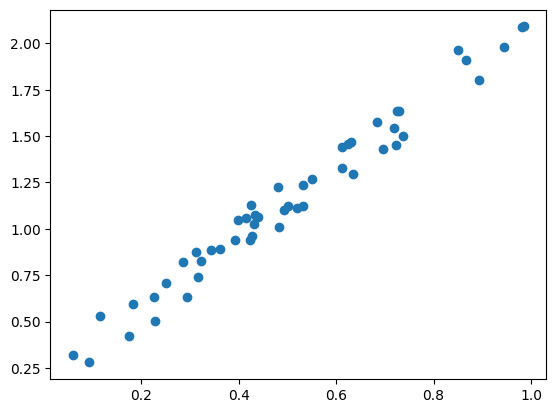

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data1, data2)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
data_pca = pca.fit_transform(np.hstack((data1[:, np.newaxis],data2[:, np.newaxis])))

In [ ]:
data_pca

array([[ 3.33545268e-01,  4.80346700e-02],
       [-3.95439719e-01, -4.00946670e-02],
       [-5.87646777e-01, -8.40870569e-03],
       [ 1.22355594e-01, -7.01293201e-03],
       [ 4.44306979e-01,  1.72348326e-02],
       [-2.28674920e-01,  2.84716289e-02],
       [ 1.04839246e+00,  1.83912546e-03],
       [ 4.57281315e-01, -2.83031768e-02],
       [ 5.32315162e-02, -5.07194102e-02],
       [-2.42860121e-01,  9.19819003e-04],
       [-3.09846124e-01, -1.97961670e-02],
       [ 5.30683359e-01, -1.61683069e-02],
       [-1.08409236e-01, -1.56491692e-02],
       [-9.42310239e-01, -1.48296595e-02],
       [-1.40948617e-01, -4.45302190e-02],
       [ 4.16398024e-01,  5.23120390e-02],
       [-6.43930056e-01, -2.94532239e-02],
       [-7.98573310e-01,  4.17078231e-02],
       [-1.55494257e-02,  4.12999436e-02],
       [ 8.60985773e-02, -1.03616372e-02],
       [ 1.88106732e-01,  5.26855757e-02],
       [ 8.79825388e-01, -5.94771607e-02],
       [ 5.31445418e-01, -2.17180269e-02],
       [ 3.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(np.hstack((data1[:, np.newaxis], data2[:, np.newaxis])))

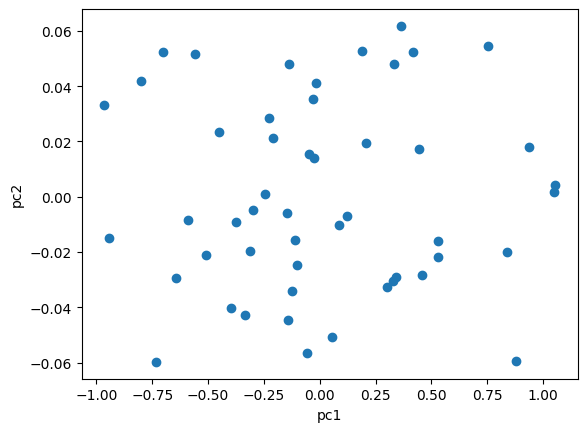

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.show()

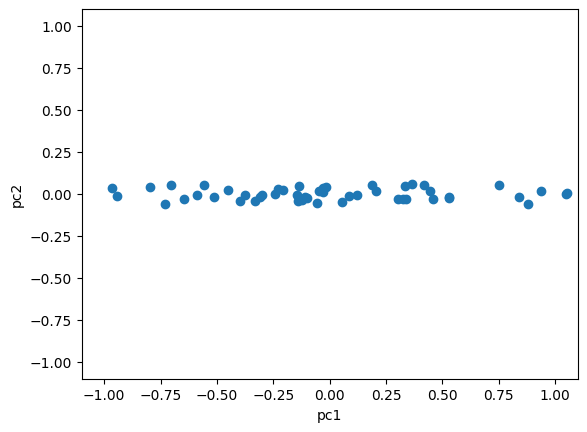

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data[:, [1, 3]]

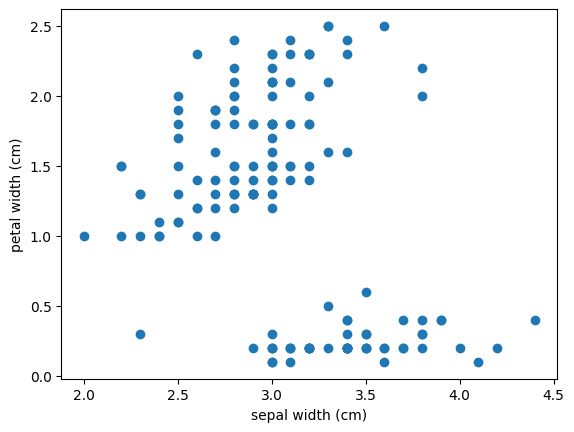

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal width (cm)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)

In [ ]:
data_km = km.fit_predict(data)

In [ ]:
data_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
data_km = km.fit_predict(data)

In [ ]:
data[data_km == 0, 0]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [ ]:
data[data_km == 0, 1]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2])